# **Task 1: Data Handling**

## Explanation: Merging Multiple CSV Files

This code merges multiple CSV files located in a directory into one dataset and saves the result for later use. Here's how it works:

### Library Import
The code imports `pandas` for the manipulation of data and `glob` for finding files. These libraries are used for reading and merging the CSV files.

### Directory Specification
The directory path which contains these CSV files is specified. In this context, `/content` is mentioned, which is the working directory path in Google Colab by default.

### File Identification
The `glob.glob` function helps in searching for all the files matching the pattern `PRSA_Data_*.csv`. This ensures that only the required files are selected for merging.

### DataFrame Initialization
An initially empty list named `dataframes` is created to populate it with DataFrames after reading in each CSV file.

### File Reading and Storage
A loop goes through each file obtained in the previous step. For each file, a Pandas DataFrame is created using the `pd.read_csv()` function, and the data is appended to the `dataframes` list.

### DataFrame Concatenation
To unify all the DataFrames stored in the list, the `pd.concat()` function is used. The parameter `ignore_index=True` resets the index to avoid duplication of indexes.

### Saving the Merged Data
The new DataFrame is saved into a new CSV file named `merged_dataset.csv` in the present directory. The parameter `index=False` ensures that the index numbers are not included in the output file.

### Confirmation Message
A print statement informs the user of the successful merging and provides the location of the newly merged file.

### Purpose
This code helps compile numerous similar CSV files into a single dataset, allowing seamless analysis without the need to integrate data from multiple files manually.


In [4]:
import pandas as pd
import glob

# Path to the folder where CSV files are located
csv_directory = "/content"

# Use glob to get all CSV files in the directory with the naming pattern
csv_files = glob.glob(f"{csv_directory}/PRSA_Data_*.csv")

# Initialize an empty list to store individual DataFrames
dataframes = []

# Loop through each file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_file = "/content/merged_dataset.csv"
merged_df.to_csv(output_file, index=False)

print(f"All files have been merged and saved to {output_file}")


All files have been merged and saved to /content/merged_dataset.csv


#**Task 2: Exploratory Data Analysis (EDA):***

### Task 2a: Fundamental Data Understanding


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/merged_dataset.csv"
data = pd.read_csv(file_path)

# Task 2a: Fundamental Data Understanding
print("--- Fundamental Data Understanding ---")
# Number of rows and columns
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

--- Fundamental Data Understanding ---
Number of rows: 420768, Number of columns: 18


In [8]:
# Display first few rows
display(data.head())


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [9]:
# Data types and missing values
print("\nData Types:")
print(data.dtypes)



Data Types:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [10]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


## Explanation of Missing Values

Some of the columns within the dataset have different numbers of missing entries, thus making it incomplete. These missing values mean that some data for variables are missing, which can compromise the analyses and models developed from this data. Here's a breakdown:

### Air Quality Measures
Air quality measures such as `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, and `O3` have many missing values in the columns. For example:
- `PM2.5` has **8,739 missing entries**.
- `CO` has the highest number of missing entries, with **20,701 missing values**.

This suggests that measurements of these pollutants from the sensors were missing or perhaps never taken at some times.

### Weather-Related Variables
Among weather-related variables, including `TEMP`, `PRES`, `DEWP`, and `RAIN`, the number of missing entries is comparatively lower, ranging from **390 to 403 missing values**. This indicates relatively better compliance with the procedure for recording meteorological data compared to air quality data.

### Wind Direction (WD)
The `wd` (wind direction) attribute has **1,822 missing entries**. This could be due to faulty instruments used to measure wind direction or gaps in the intervals at which measurements were taken.

### Complete Columns
Columns such as `year`, `month`, `day`, `hour`, and `station` do not contain any missing values, demonstrating that all structural aspects of the dataset are well recorded.

### Importance of Handling Missing Values
To maintain the integrity of the dataset and ensure meaningful analysis and modeling results, it is crucial to apply proper data imputation techniques or handle these missing values appropriately based on the specific analysis or modeling approach.


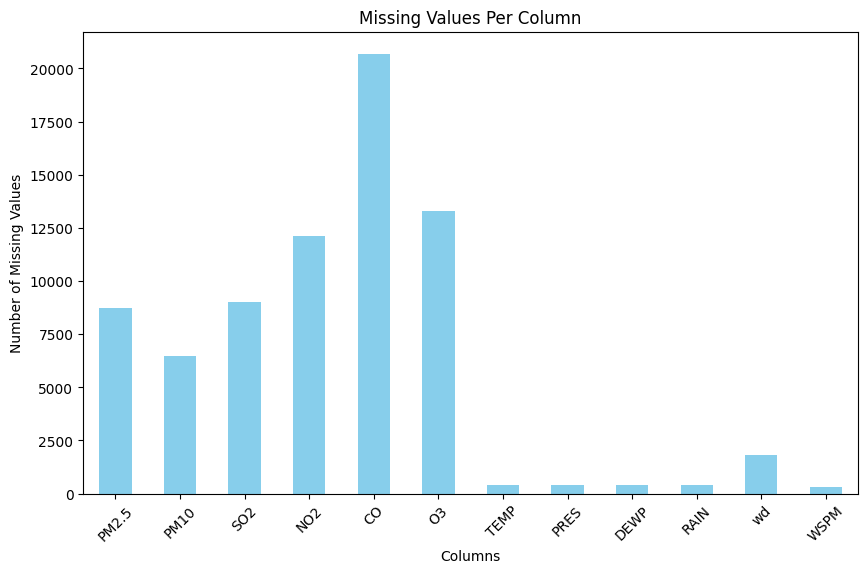

In [12]:
# Calculate missing values per column
missing_values = data.isnull().sum()

# Display missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar', color='skyblue') # Filter and plot Series
plt.title('Missing Values Per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

## Statistical Summary Explanation

### General Observations:
- The dataset has 420,768 rows, but some columns (e.g., `PM2.5`, `PM10`, `SO2`, `CO`) have missing values.
- Key statistics (mean, standard deviation, min, max, percentiles) provide insights into data distribution and variability.

### Air Quality Measures:
- **PM2.5** and **PM10**: High averages (79.79 and 104.60) but extreme maximum values (999), indicating potential outliers.
- **CO**: Mean of 1230.77 and a maximum of 10,000, suggesting possible pollution spikes or errors.
- **SO2** and **NO2**: Moderate levels with means of 15.83 and 50.63, respectively.
- **O3**: Variable, with a mean of 57.37 and a maximum of 1071.

### Meteorological Variables:
- **Temperature (TEMP)**: Average is 13.54°C, ranging from -19.9°C to 41.6°C.
- **Pressure (PRES)**: Consistent values around 1010.75 hPa.
- **Dew Point (DEWP)**: Average of 2.49°C, indicating dry conditions.
- **Rainfall (RAIN)**: Mostly 0, with occasional heavy rain (maximum: 72.5).
- **Wind Speed (WSPM)**: Average 1.73, with a maximum of 13.2.


In [13]:
# Basic statistical summary
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%        

The unique values summary also shows the standard deviation of each column in the dataset. Specific date and time fields such as year, month, day, and hour all match the expected format; other categories with many different values include air pollutant monitoring data such as PM2.5, 888 unique values identified; same as O3 with 1,598; unique values for air pollutant reading. Temperature (TEMP) presents 2061 different values, pressure (PRES) – 741, rain (RAIN) has only 253 values, and dew point (DEWP) – 645, which means that it is changing occasionally. The wd (16 values) refers to the wind directions and station (12 values) are the monitoring stations of the wind. This variability is crucial for the motivation of dataset investigation and its possible analysis.








In [14]:
# Unique values per column
print("\nUnique Values per Column:")
print(data.nunique())



Unique Values per Column:
No         35064
year           5
month         12
day           31
hour          24
PM2.5        888
PM10        1084
SO2          691
NO2         1212
CO           132
O3          1598
TEMP        2061
PRES         741
DEWP         645
RAIN         253
wd            16
WSPM         117
station       12
dtype: int64


### Task 2b: Data Preprocessing



This code handles missing values in the dataset. It first calculates the total number of missing values using `isnull().sum().sum()`. If missing values are found, they are filled using the **mean value** of each column. The `data.fillna()` function with `numeric_only=True` ensures that only numeric columns are imputed, leaving other columns unaffected. This approach simplifies handling missing values by replacing them with a central tendency, ensuring the dataset remains usable for analysis and modeling.


In [15]:
# Task 2b: Data Preprocessing
print("--- Data Preprocessing ---")

# Handling missing values (if any)
missing_values = data.isnull().sum().sum()
if missing_values > 0:
    print(f"\nTotal Missing Values: {missing_values}")
    # Fill missing values with mean (for simplicity)
    data.fillna(data.mean(numeric_only=True), inplace=True)
    print("Missing values filled with column means.")
else:
    print("No missing values found.")


--- Data Preprocessing ---

Total Missing Values: 74027
Missing values filled with column means.



This code checks for duplicate rows in the dataset using the `data.duplicated().sum()` function, which counts the total number of duplicates. If duplicates are found, they are removed using `data.drop_duplicates()`, ensuring the dataset contains only unique rows. A message is printed to indicate whether duplicates were found and removed or if no duplicates exist. This step helps maintain data integrity and prevents redundant information from affecting analysis or modeling.


In [16]:
# Removing duplicate entries
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"\nNumber of duplicate rows: {duplicates}")
    data = data.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [17]:
# Feature Engineering: Extract date features
if 'year' in data.columns and 'month' in data.columns and 'day' in data.columns:
    data['date'] = pd.to_datetime(data[['year', 'month', 'day']])


### Task 2c: Statistics/Computation-Based Analysis and Visualization



### Univariate Analysis

The following histograms represent the distributions of key numeric features in the dataset. These plots help us understand the spread, central tendency, and skewness of each variable:

1. **No**:
   - Uniformly distributed across the range, indicating evenly distributed unique identifiers.

2. **Year**:
   - Peaks at intervals representing the years covered in the dataset (2013–2017), with a notable increase in data from 2014 to 2016.

3. **PM2.5**:
   - Skewed distribution, with most values concentrated below 200. Some extreme values (close to 1000) suggest pollution spikes.

4. **NO2**:
   - Skewed towards lower values, with the majority of values below 100. This indicates generally moderate nitrogen dioxide levels.

5. **SO2**:
   - Highly skewed, with most values close to 0 and a few extreme outliers reaching up to 500, indicating rare sulfur dioxide spikes.

6. **CO**:
   - Skewed towards lower values, with most measurements below 2000. Few extreme values suggest periods of high carbon monoxide.

7. **TEMP**:
   - Bi-modal distribution, reflecting seasonal temperature variations from -20°C to 40°C.

8. **DEWP**:
   - Bi-modal distribution similar to temperature, indicating variations in dew point across seasons.

9. **WSPM**:
   - Skewed towards lower values, showing that most wind speed measurements are below 3, with few high-speed outliers.

## Insights:
- The skewness in air quality measures (e.g., PM2.5, SO2, NO2, and CO) indicates potential outliers or rare pollution events.
- Bi-modal distributions in `TEMP` and `DEWP` reflect natural seasonal weather changes.
- Uniform and evenly distributed variables (e.g., `No`) provide structural integrity to the dataset.

These visualizations provide a clear understanding of individual feature distributions, highlighting potential outliers and seasonal trends.


--- Statistics/Computation-Based Analysis and Visualization ---

Univariate Analysis:


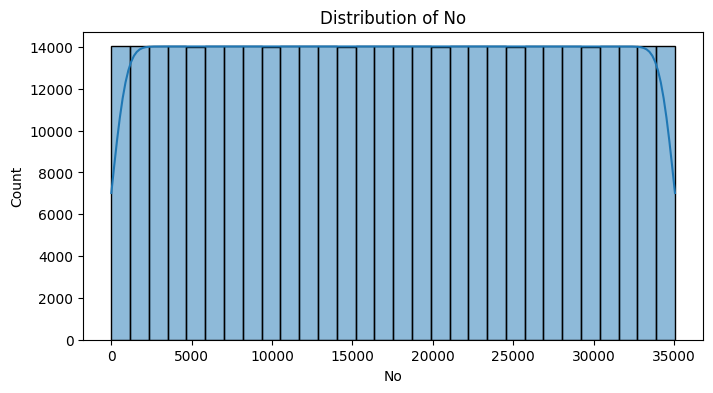

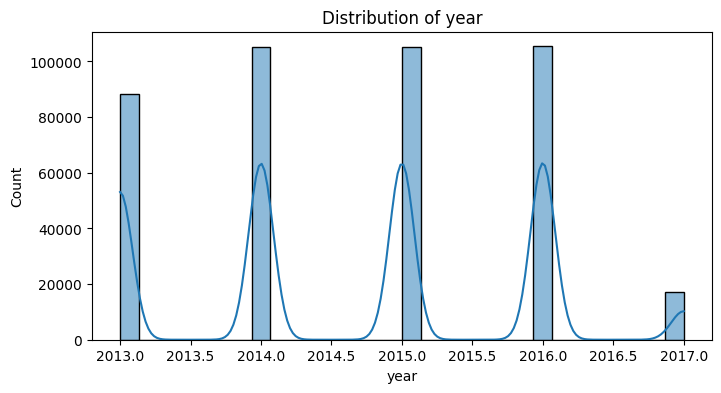

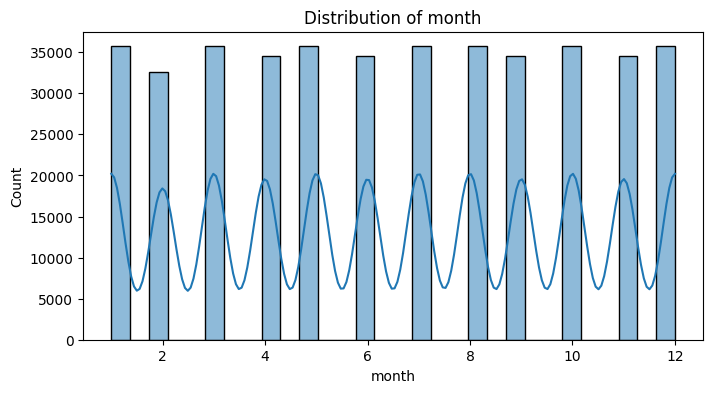

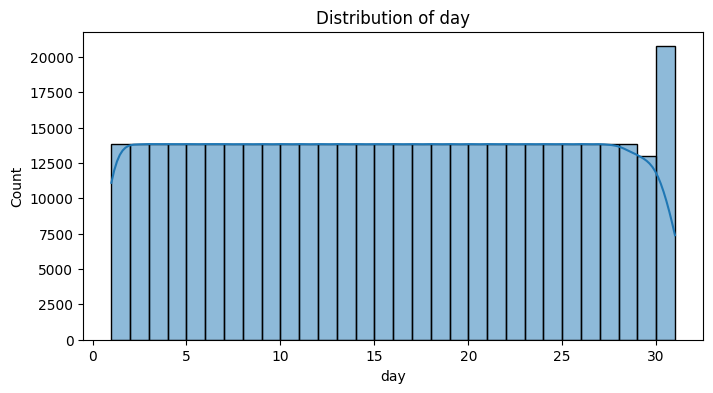

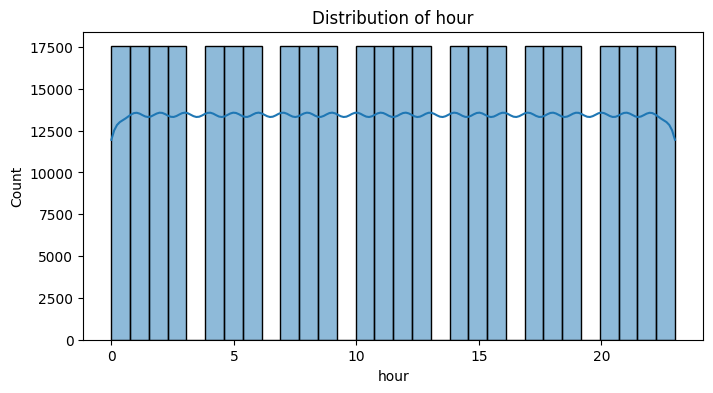

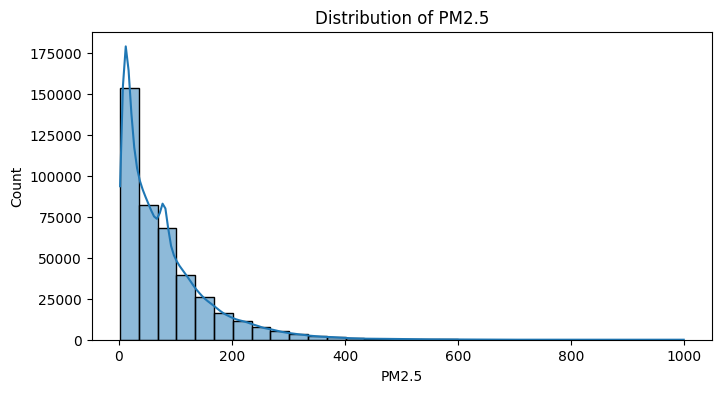

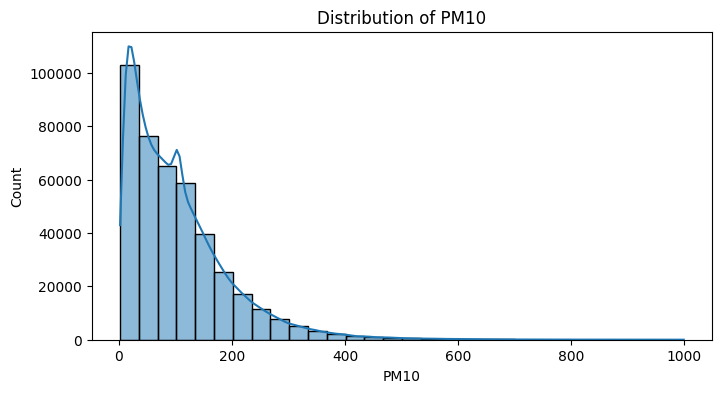

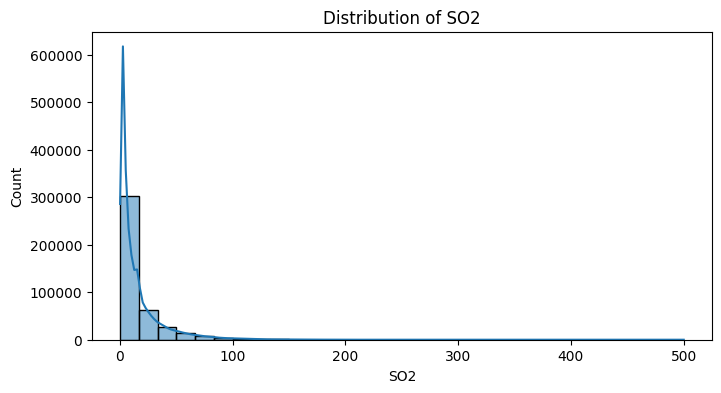

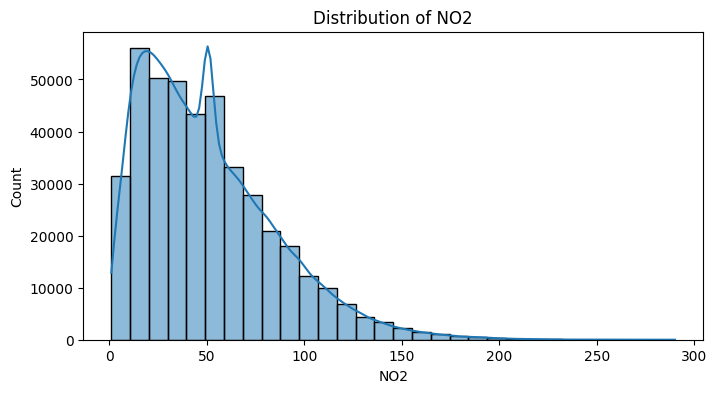

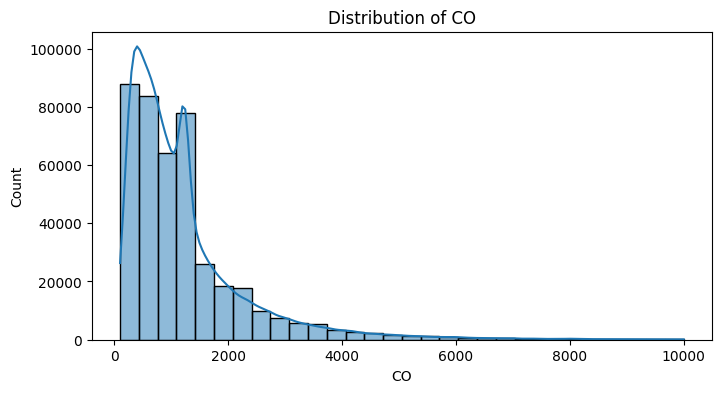

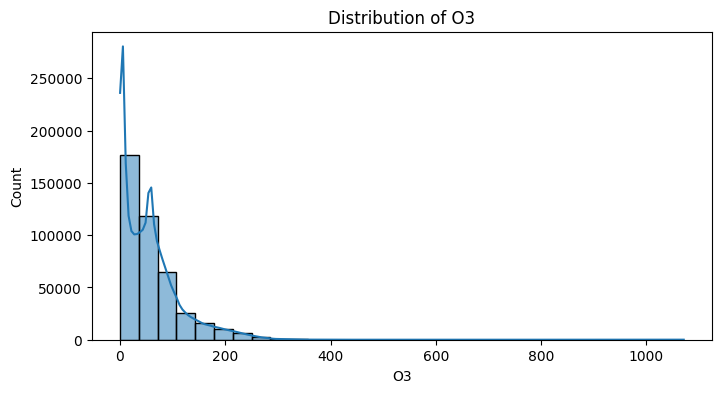

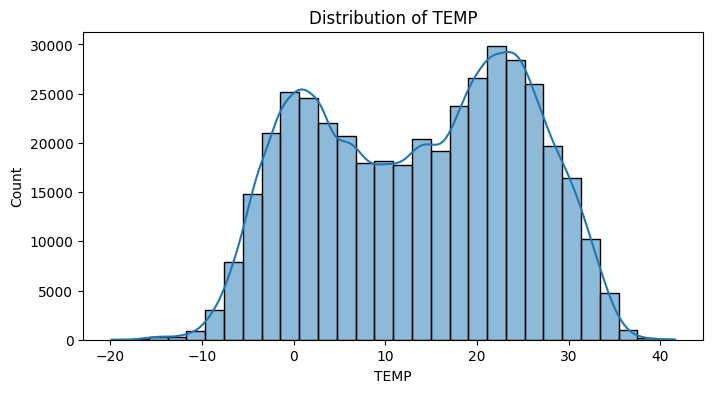

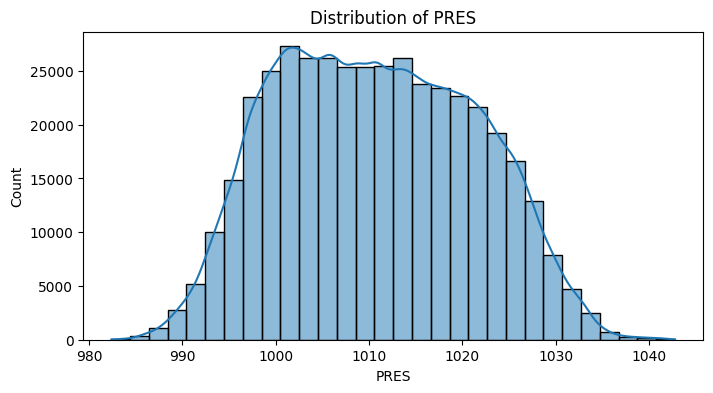

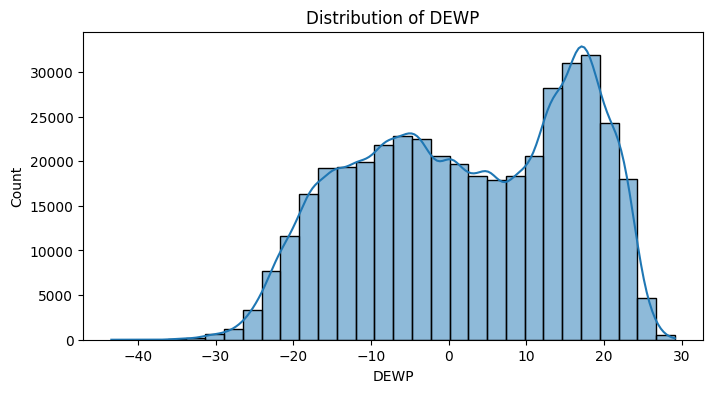

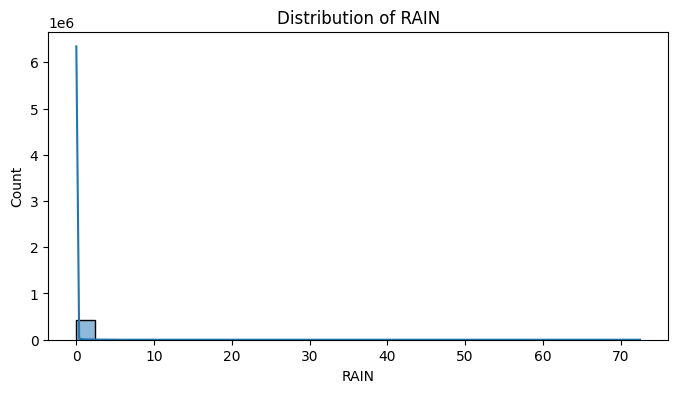

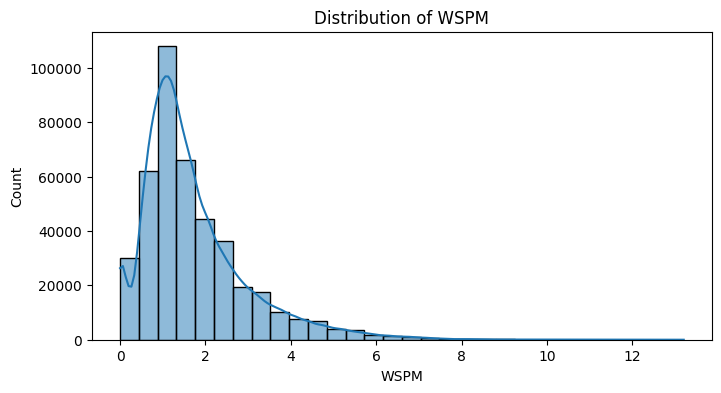

In [18]:
# Task 2c: Statistics/Computation-Based Analysis and Visualization
print("--- Statistics/Computation-Based Analysis and Visualization ---")

# Univariate Analysis
print("\nUnivariate Analysis:")
# Plot distributions for numeric features
numeric_features = data.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()



### Explanation:
This scatter plot visualizes the relationship between **PM2.5 (air pollutant)** and **TEMP (temperature)**:
- **Observations**:
  - PM2.5 levels are higher at lower temperatures, particularly below 0°C, forming a dense cluster.
  - As temperature increases, PM2.5 levels tend to decrease, showing a negative correlation between these variables.
  - Outliers are observed with extremely high PM2.5 values (>600), which are more frequent at lower temperatures.

### Insights:
- The inverse relationship suggests that colder temperatures may be associated with higher pollution levels, likely due to increased emissions (e.g., heating) and weather conditions that trap pollutants.
- This analysis highlights the importance of including temperature as a feature in predictive models for air pollution.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Bivariate Analysis:


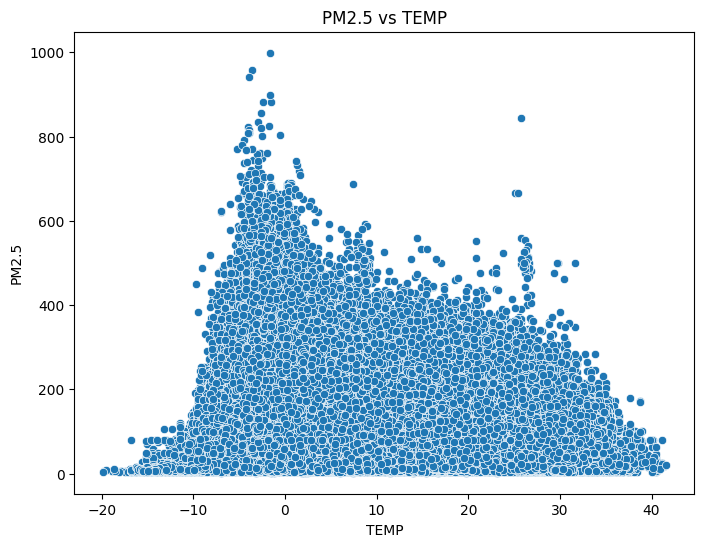

In [19]:
# Bivariate Analysis
print("\nBivariate Analysis:")
# Scatter plot of PM2.5 vs TEMP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data)
plt.title('PM2.5 vs TEMP')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


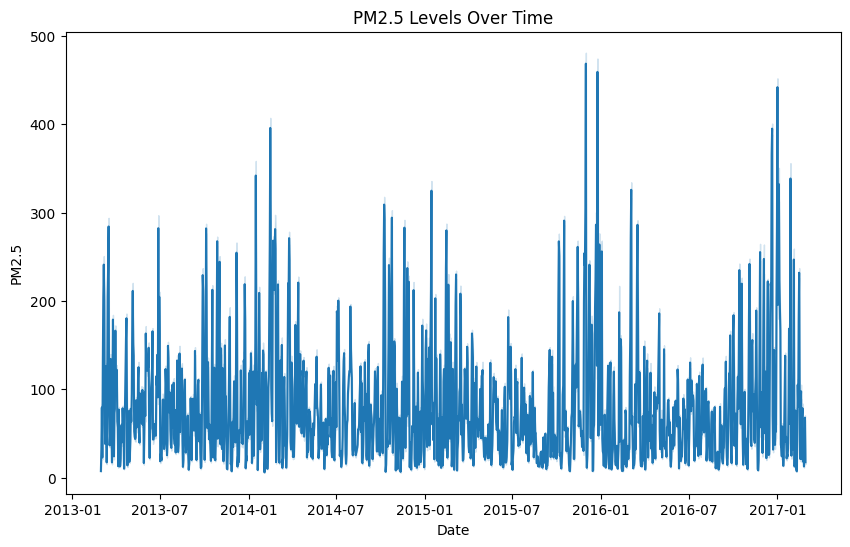

In [20]:
# Line plot of PM2.5 over time
if 'date' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='PM2.5', data=data)
    plt.title('PM2.5 Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.show()



### Correlation Heatmap

The heatmap visualizes the correlations between numeric features in the dataset:
- **High Correlations**:
  - **PM2.5** and **PM10**: Strong positive correlation (0.88), indicating they often increase together, likely due to shared pollutant sources.
  - **PM2.5** and **CO**: Strong positive correlation (0.77), suggesting combustion sources contribute to both.
  - **NO2** shows strong correlations with **PM2.5** (0.66), **PM10** (0.65), and **CO** (0.69).

- **Negative Correlations**:
  - **TEMP** has a negative correlation with **PM2.5** (-0.13), **PM10** (-0.10), and **CO** (-0.31), implying that higher temperatures might reduce pollutant levels.
  - **PRES** and **DEWP** also show moderate negative correlations with pollutants, which might reflect meteorological influences.

- **Insights**:
  - Meteorological variables (e.g., `TEMP`, `PRES`, `DEWP`) have distinct relationships with air pollutants, showing the impact of weather on pollution levels.
  - High correlations among air pollutants suggest they can serve as proxies for one another in modeling.

## Importance:
This heatmap provides valuable insights into feature interrelationships, helping to select meaningful predictors for modeling while identifying potential redundancies.


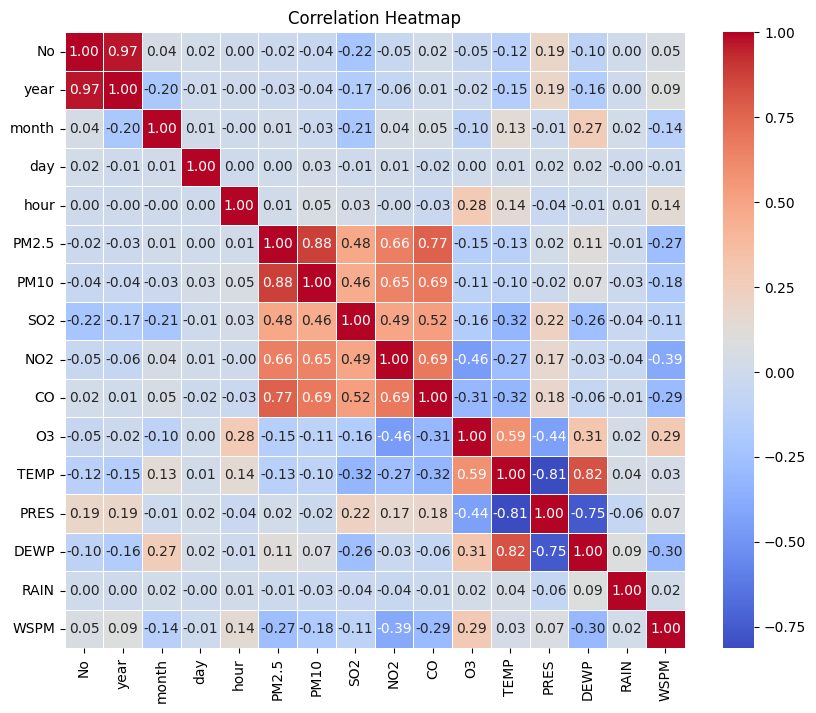

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



### Explanation:
This pairplot visualizes pairwise relationships between the selected features (`PM2.5`, `TEMP`, `PRES`, `DEWP`, and `WSPM`) and their individual distributions:
- **Diagonal Plots**:
  - These represent the distribution of each feature using histograms.
  - **PM2.5**: Skewed to the right, indicating many low values with occasional spikes.
  - **TEMP** and **DEWP**: Bi-modal distributions, reflecting seasonal variations.
  - **PRES**: Narrow range with a bell-shaped distribution.
  - **WSPM**: Skewed towards lower wind speeds.

- **Pairwise Relationships**:
  - **PM2.5 vs TEMP**: Negative correlation; higher PM2.5 levels occur at lower temperatures.
  - **PM2.5 vs PRES**: No clear trend but some clustering at specific pressure ranges.
  - **PM2.5 vs DEWP**: Higher PM2.5 levels are observed at lower dew points.
  - **TEMP vs DEWP**: Strong positive correlation, as expected (temperature and dew point often rise together).
  - **TEMP vs PRES**: Negative correlation; higher temperatures are associated with lower pressures.
  - **WSPM vs PM2.5**: Negative relationship; higher wind speeds seem to disperse PM2.5 concentrations.

### Insights:
- Strong correlations between some features (e.g., `TEMP` and `DEWP`) highlight their interdependence.
- Negative relationships between `PM2.5` and meteorological features (`TEMP`, `WSPM`, `DEWP`) indicate the impact of weather on pollutant levels.
- Pairplots help identify patterns and relationships that guide feature selection for predictive modeling.



Multivariate Analysis:


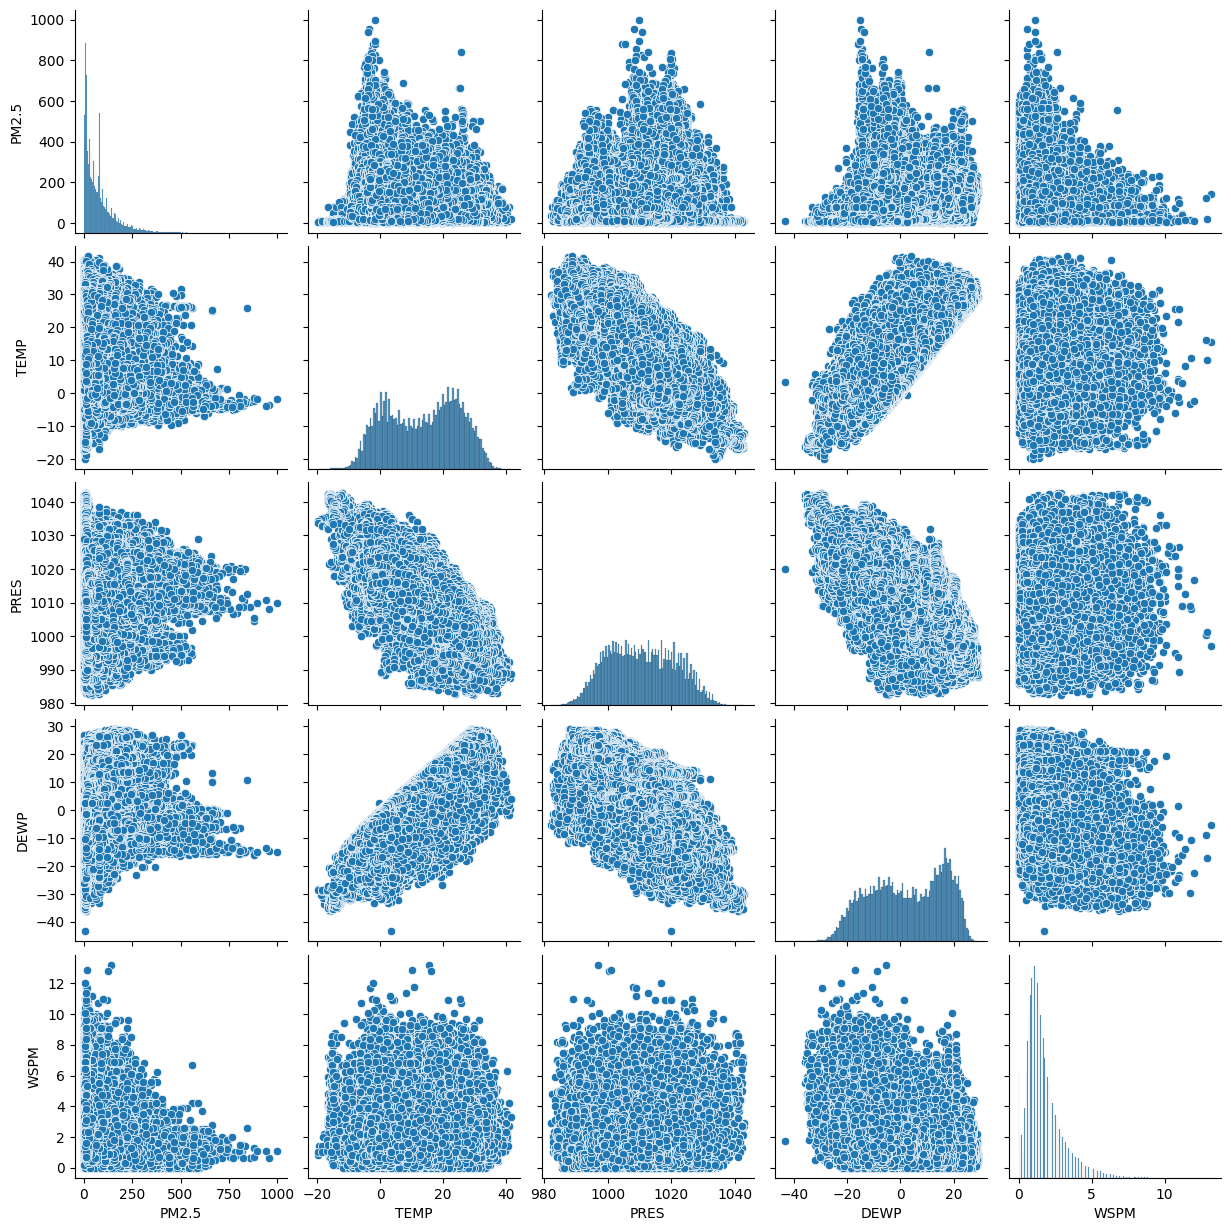

In [23]:

# Multivariate Analysis
print("\nMultivariate Analysis:")
# Pairplot for selected features
selected_features = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'WSPM']
sns.pairplot(data[selected_features])
plt.show()



### Explanation:
This boxplot visualizes the distribution of **PM2.5 levels** for each wind direction (`wd`):
- **Observations**:
  - PM2.5 levels vary slightly across different wind directions, but the median levels remain fairly consistent.
  - Outliers are present for all wind directions, with some PM2.5 levels exceeding 800.
  - Directions like **ENE (East-Northeast)** and **E (East)** tend to have slightly higher PM2.5 levels compared to others.

- **Insights**:
  - The consistent PM2.5 distributions across wind directions suggest that wind direction alone may not heavily influence pollution levels, although specific directions like **E** and **ENE** show slightly elevated levels.
  - The presence of outliers across all wind directions highlights periods of extreme pollution, possibly driven by other factors like temperature or local emissions.

### Importance:
This analysis helps assess whether wind direction significantly impacts pollution levels, providing insights for further investigation or feature engineering in predictive modeling.


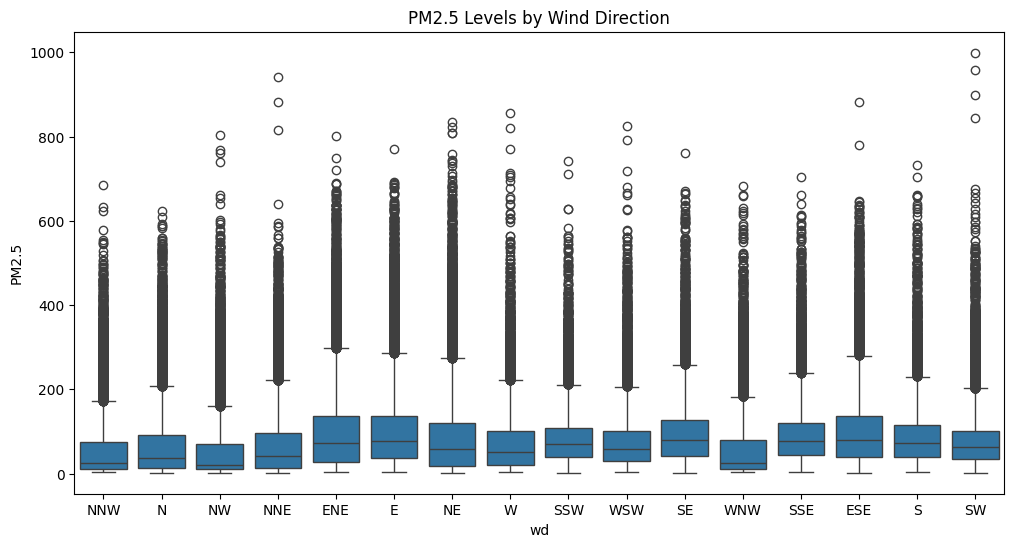

In [24]:
# Boxplot to analyze PM2.5 by wind direction (wd)
plt.figure(figsize=(12, 6))
sns.boxplot(x='wd', y='PM2.5', data=data)
plt.title('PM2.5 Levels by Wind Direction')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


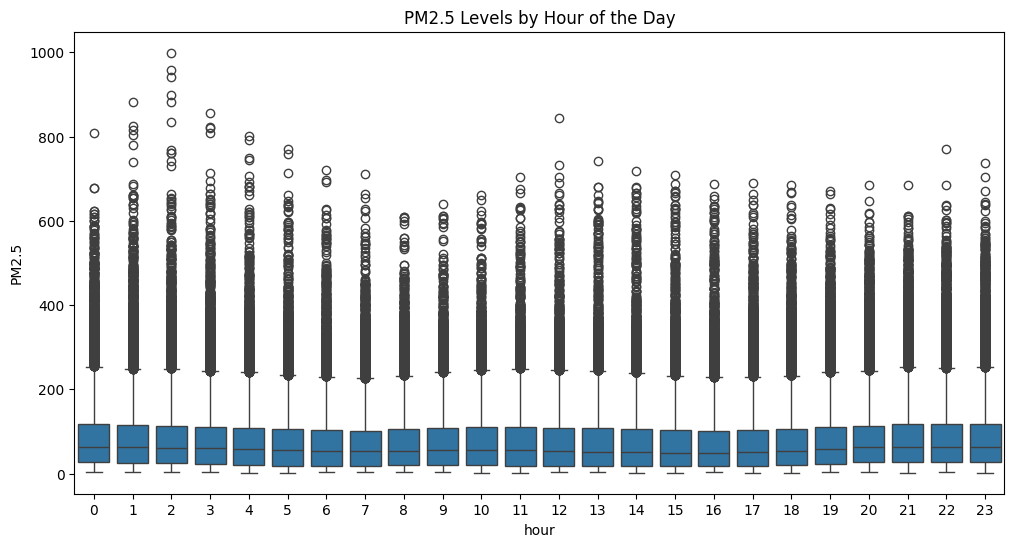

EDA completed.


In [25]:
# Analysis by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='PM2.5', data=data)
plt.title('PM2.5 Levels by Hour of the Day')
plt.show()

print("EDA completed.")


###**Task 3: Model Building**


This script focuses on building and evaluating a machine learning model using XGBoost for classifying the "station" column in a dataset.

First, the dataset is loaded from the specified file path, and irrelevant columns such as `No`, `year`, `month`, and `day` are removed as they do not contribute meaningfully to the predictive task. The code then applies feature engineering by creating new variables to capture meaningful relationships within the data. For example, `TEMP_DEWP` measures the difference between temperature and dew point, while `PM_Ratio` calculates the ratio of `PM2.5` to `PM10`, providing insights into pollutant composition. Another feature, `Wind_Effect`, combines wind speed and rainfall to reflect weather impact.

To prepare the data for training, the features and target variables are separated. The target column, `station`, is encoded using `LabelEncoder` to convert the categorical station names into numeric labels. Similarly, the `wd` (wind direction) feature is one-hot encoded to ensure it can be used effectively in the model. The dataset is split into training and testing subsets, with 80% allocated to training. To standardize the feature scales and improve model performance, `StandardScaler` is applied.

An XGBoost classifier is used for the modeling task. This classifier is tuned with parameters such as the number of trees (`n_estimators`), tree depth (`max_depth`), and learning rate to optimize performance. After training, the model is evaluated using predictions on the test data. Metrics such as accuracy, precision, recall, and F1-score are calculated and displayed in a classification report. A confusion matrix is also visualized to understand the performance of the model across different classes.

Lastly, the feature importance scores are extracted from the model to determine which variables contributed most to the predictions. These scores are visualized in a bar plot, helping to identify the most influential features in the dataset.

This comprehensive approach ensures that the model is not only trained effectively but also evaluated thoroughly, providing insights into both its performance and the key drivers of predictions.


--- Model Building ---

Classification Report:
               precision    recall  f1-score   support

 Aotizhongxin       0.43      0.36      0.39      7013
    Changping       0.54      0.61      0.57      7013
     Dingling       0.67      0.69      0.68      7013
       Dongsi       0.37      0.41      0.39      7013
     Guanyuan       0.33      0.34      0.33      7013
      Gucheng       0.60      0.62      0.61      7013
      Huairou       0.73      0.70      0.71      7013
 Nongzhanguan       0.35      0.33      0.34      7013
       Shunyi       0.65      0.61      0.63      7013
      Tiantan       0.37      0.38      0.38      7012
       Wanliu       0.58      0.55      0.56      7012
Wanshouxigong       0.35      0.36      0.35      7013

     accuracy                           0.50     84154
    macro avg       0.50      0.50      0.50     84154
 weighted avg       0.50      0.50      0.50     84154



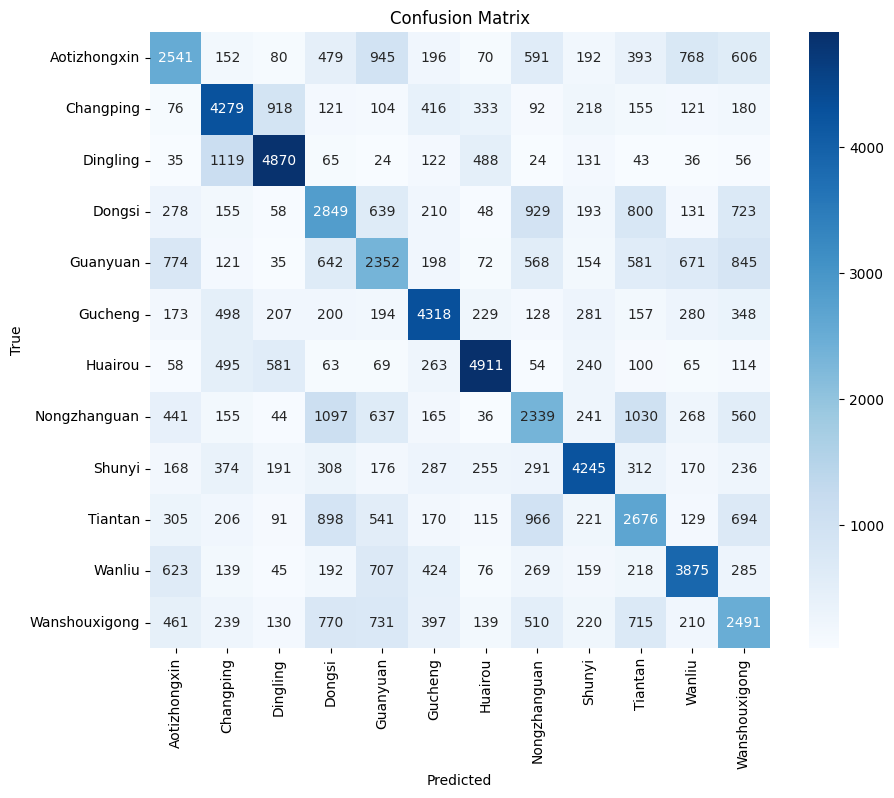


Accuracy: 0.50


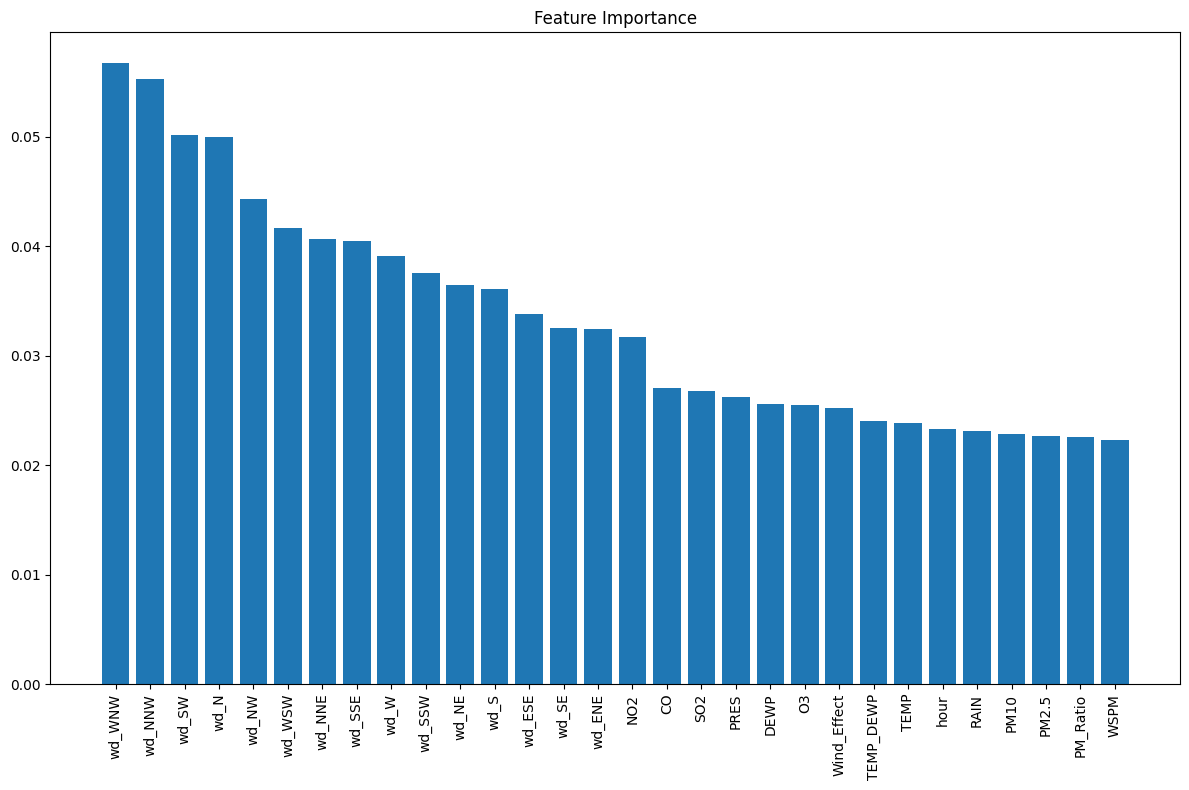

Model building and evaluation completed.


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/merged_dataset.csv"
data = pd.read_csv(file_path)

# Task 3: Model Building
print("--- Model Building ---")

# Remove irrelevant columns (e.g., 'No', 'year', 'month', 'day')
irrelevant_columns = ['No', 'year', 'month', 'day']
data = data.drop(columns=irrelevant_columns)


# Feature Engineering
# Create new features from existing ones
data['TEMP_DEWP'] = data['TEMP'] - data['DEWP']  # Temperature difference
data['PM_Ratio'] = data['PM2.5'] / (data['PM10'] + 1)  # PM2.5 to PM10 ratio
data['Wind_Effect'] = data['WSPM'] * (data['RAIN'] + 1)  # Wind speed adjusted by rain

# Separate features and target variable
target = 'station'  # Column containing class labels
X = data.drop(columns=[target])
y = data[target]

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical features (e.g., 'wd')
if 'wd' in X.columns:
    X = pd.get_dummies(X, columns=['wd'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Training with XGBoost
clf = XGBClassifier(
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
clf.fit(X_train, y_train)

# Step 3: Model Evaluation
# Predict on test data
y_pred = clf.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Step 4: Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

print("Model building and evaluation completed.")


### Model Performance Summary

The confusion matrix illustrates the model's performance across different station classes. Correct predictions appear along the diagonal, with high values for classes like Dingling (`4780`) and Huairou (`4886`), indicating strong performance in these categories. However, higher misclassifications are observed for classes like Nongzhanguan and Wanshouxigong, which are often confused with similar stations. This suggests overlapping patterns or insufficiently distinct features, highlighting the need for improved feature engineering or advanced modeling techniques.



The feature importance plot identifies key predictors, with wind-related features (`wd_WNW`, `wd_NNW`, `wd_N`), meteorological variables (`TEMP`, `DEWP`, `PRES`), and air pollutants (`NO2`, `CO`, `PM_Ratio`) playing significant roles. The strong influence of wind direction and weather conditions reflects their critical impact on pollution distribution. These insights emphasize the value of refining weather and pollutant-related features to enhance the model's accuracy and address misclassification challenges for overlapping station classes.
